In [52]:
# imports 

import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [53]:
# show columns with missing values

df.isna().sum()

# https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null

#null_columns=df.columns[df.isnull().any()]
#df[null_columns].isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [54]:
# make a copy of the dataset 

df_original = df

# Process categorical features 

## Remove redundant attributes

In [55]:
# check spread on contact column

df['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

Majority of calls are cellular. This means this column is unlikely to hold useful information as most customers are contacted via the same means, this column can be removed.  

There is an argument to remove the `day` and `month` attributes also but perhaps the weekends or a particular season has an effect on the outcome of the campaign.

In [67]:
print(1663/(1663+146))

0.9192924267551134


In [56]:
df.drop('contact', axis=1, inplace=True)
df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,22,sep,208,2,-1,0,NaN,yes


## Encode ordinal categorical attributes

Ordinal data is data which has natural, ordered categories (https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9)

Based on this definition, we have a single ordinal attribute: `education`

In [57]:
# get all education levels 

df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [58]:
# map education levels

edu_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(edu_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,22,sep,208,2,-1,0,NaN,yes


## Encode nomial categorical attributes 

Nomial data is data which can be seperated into distinct, non overlapping categories (https://www.mytutor.co.uk/answers/4496/A-Level/Psychology/What-is-meant-by-the-terms-nominal-ordinal-interval-and-ratio-data-and-why-is-it-important-to-know-the-difference-between-the-four-terms/)

Based on this, the following attributes are considered nominal data: `job`, `marital`, `default`, `housing`, `loan`, `month`, `poutcome` and `subscribed` of these attributes only `job` and `poutcome` are missing values.

In [59]:
# one-hot encode job and poutcome attributes

df = pd.get_dummies(df, columns=['job', 'poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,sep,327,...,0,0,0,1,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,sep,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,sep,231,...,1,0,0,0,0,0,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,sep,185,...,0,0,1,0,0,0,0,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,sep,208,...,0,0,0,0,0,0,0,0,0,1


In [60]:
# one-hot encode the other categorical attributes 

df = pd.get_dummies(df, drop_first=True)
df.tail()

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,subscribed_yes
1995,20.0,NaN,2785,16,327,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1996,28.0,1.0,127,16,1334,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1997,81.0,0.0,1154,17,231,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1998,46.0,0.0,4343,20,185,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1999,40.0,1.0,6403,22,208,2,-1,0,0,1,...,0,0,0,0,0,0,0,0,1,1


# Deal with missing values

As previously seen, we have 3 attributes with missing values `age`, `job`, `education` and `poutcome`

## Missing values in the `age` attribute

Theory: `age` can be estimated using `marital` and `education` 

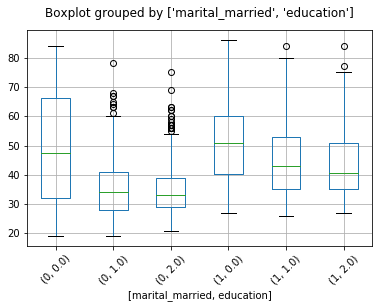

In [61]:
df.boxplot(column='age', by=['marital_married','education'], rot=45)
plt.title("")
plt.show()

age                   12
education            104
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
subscribed_yes         0
dtype: int64

Good variation seen across each box plot, show a pivot table with the median of each group

In [62]:
ptable = df.pivot_table(values='age', 
                        index='marital_married',
                        columns='education',  
                        aggfunc=np.median)
ptable

education,0.0,1.0,2.0
marital_married,,,
0,47.5,34.0,33.0
1,51.0,43.0,40.5


Create function to apply pivot table values to missing values of `age`

In [63]:
# Define function to return an element of the pivot table
# note this can only run once!! 

def get_element(x):
    return ptable.loc[x['marital_married'], x['education']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

# check for missing values
df.isna().sum()

age                    0
education            104
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
subscribed_yes         0
dtype: int64

## Missing values in the `education` attribute

Theory: `education` can be estimated using `job`. I tried picking 3 jobs which give a spread of primary to tertiary education

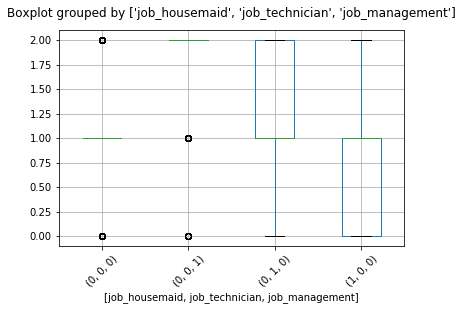

In [34]:
df.boxplot(column='education', by=['job_housemaid','job_technician', 'job_management'], rot=45)
plt.title("")
plt.show()

In [ ]:
# Define function to return an element of the pivot table
# note this can only run once!! 

def get_element(x):
    return ptable.loc[x['job_housemaid'], x['job_management']] # use all jobs instead?

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

# check for missing values
df.isna().sum()